In [2]:
%matplotlib notebook
from pySMI.smi_libs import *
from pySMI.smi_package import *
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams.update({ 'image.origin': 'lower'   })
plt.rcParams.update({ 'image.interpolation': 'none'   })

from databroker import Broker
db = Broker.named('smi')

In [1]:
%run ~/pySMI/pySMI/smi_generic_functions.py

/opt/conda_envs/pyCHX/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# Setup

In [4]:
beam_x = 97.0
beam_y = 1316.0   #1475 - 159

energy = 2.484 #keV
start_angle = 4.5
phi_spacing= 4.0


In [5]:
wavelength_A =12.39842/energy
sam_det = 0.275 #in meters
dq = 4*np.pi/wavelength_A  * (172/1e6/sam_det)

calibration = CalibrationGonio(wavelength_A= wavelength_A) # 20.0 keV
calibration.set_image_size(195, height=1475) # Pilatus300kW vertical
#calibration.set_image_size(1475, height=195) # Pilatus300kW horizontal
calibration.set_pixel_size(pixel_size_um=172.0)
calibration.set_beam_position(beam_x,  beam_y )
calibration.set_distance( sam_det )
calibration.set_angles(det_phi_g=0., det_theta_g=0., )
print('ratio Dw = {:.3f}'.format(calibration.get_ratioDw()))
mask_dir = '/GPFS/xf12id1/analysis/commissioning/masks/'
mask = Mask(mask_dir+'Pilatus300kWh_main_gaps-mask.png')
#mask.load('./Pilatus300kWh_current-mask.png')
mask.load(mask_dir+'Pilatus300kWh_current-mask.png')

ratio Dw = 8.199


# Define Cycle &proposal_id here

In [8]:
CYCLE='2017_3'
proposal_id =  '302179'

In [9]:
inDir = '/GPFS/xf12id1/data/300KW/images/users/%s/'%proposal_id

fp = get_base_all_filenames(inDir,base_filename_cut_length=-12 )
print('We found %s samples in %s folder.' %(len( list( fp.keys() ) ), inDir ) )

We found 142 samples in /GPFS/xf12id1/data/300KW/images/users/302179/ folder.


In [15]:
k = 'SSEBS100_2470eV_'
infiles = sorted(fp[k])
print(len(infiles))

33


In [20]:
inf1 = infiles[0:11]
print(inf1)

['/GPFS/xf12id1/data/300KW/images/users/302179/SSEBS100_2470eV_000_WAXS.tif', '/GPFS/xf12id1/data/300KW/images/users/302179/SSEBS100_2470eV_001_WAXS.tif', '/GPFS/xf12id1/data/300KW/images/users/302179/SSEBS100_2470eV_002_WAXS.tif', '/GPFS/xf12id1/data/300KW/images/users/302179/SSEBS100_2470eV_003_WAXS.tif', '/GPFS/xf12id1/data/300KW/images/users/302179/SSEBS100_2470eV_004_WAXS.tif', '/GPFS/xf12id1/data/300KW/images/users/302179/SSEBS100_2470eV_005_WAXS.tif', '/GPFS/xf12id1/data/300KW/images/users/302179/SSEBS100_2470eV_006_WAXS.tif', '/GPFS/xf12id1/data/300KW/images/users/302179/SSEBS100_2470eV_007_WAXS.tif', '/GPFS/xf12id1/data/300KW/images/users/302179/SSEBS100_2470eV_008_WAXS.tif', '/GPFS/xf12id1/data/300KW/images/users/302179/SSEBS100_2470eV_009_WAXS.tif', '/GPFS/xf12id1/data/300KW/images/users/302179/SSEBS100_2470eV_010_WAXS.tif']


In [41]:
avg = average_images( inf1,  verbose= True )

There will be 11 files to be averaged


<IPython.core.display.Javascript object>


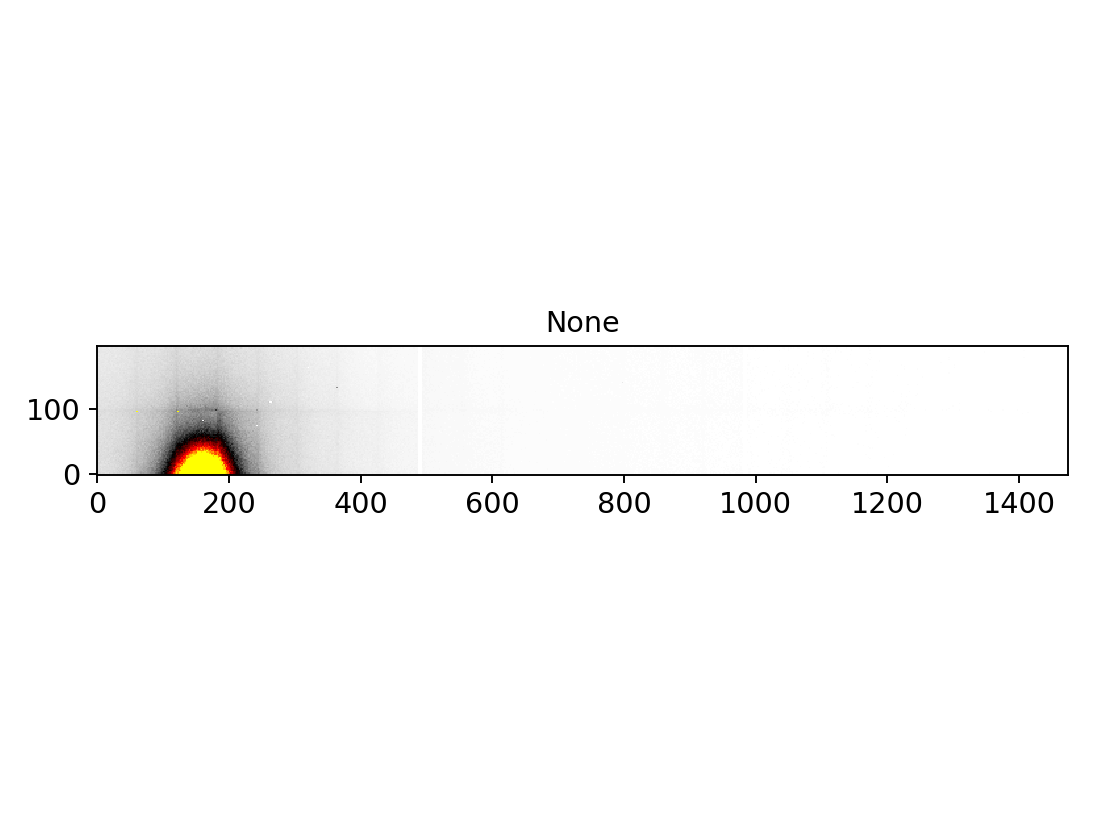

In [42]:
show_img ( avg, vmin=1e-4, vmax=10e3, aspect=1, show_colorbar=False, cmap=cmap_albula )